In [1]:
import pandas as pd
import numpy as np
rec_data = pd.read_csv('rec_df.csv')

In [2]:
# Load Surprise libraries
from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

In [3]:
# Well I'm not sure if this is the best way, but there are so few above 5 I think I can group them all together
rec_data['rating'] = rec_data['count'].apply(lambda x: 5 if (x >= 5) else x)

In [4]:
rec_data

,Unnamed: 0,user_id,product_id,count,rating
0,0,1,196,11,5
1,1,1,12427,10,5
2,2,1,10258,10,5
3,3,1,25133,9,5
4,4,1,13032,4,4
...,...,...,...,...,...
13863741,13863741,206209,23909,1,1
13863742,13863742,206209,48697,1,1
13863743,13863743,206209,755,1,1
13863744,13863744,206209,6825,1,1


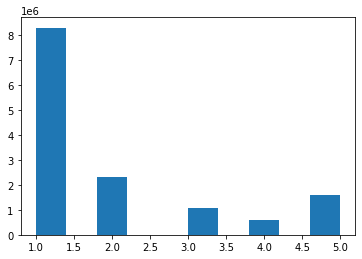

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(rec_data['rating']);

In [6]:
new_rec_data = rec_data.drop(columns='count')
new_rec_data.tail()


,Unnamed: 0,user_id,product_id,rating
13863741,13863741,206209,23909,1
13863742,13863742,206209,48697,1
13863743,13863743,206209,755,1
13863744,13863744,206209,6825,1
13863745,13863745,206209,42606,1


In [7]:
new_rec_data =  new_rec_data.drop(columns='Unnamed: 0')

In [8]:
new_rec_data

,user_id,product_id,rating
0,1,196,5
1,1,12427,5
2,1,10258,5
3,1,25133,5
4,1,13032,4
...,...,...,...
13863741,206209,23909,1
13863742,206209,48697,1
13863743,206209,755,1
13863744,206209,6825,1


In [13]:
rec_data_products = pd.merge(new_rec_data,products_Desc, on="product_id")

In [14]:
rec_data_products= rec_data_products.drop(columns='Unnamed: 0')

In [15]:
rec_data_products.to_csv('ratings_products.csv')

In [16]:
rec_data_products.head()

,user_id,product_id,rating,product_name,aisle_id,department_id,aisle,department,metadata,vector_data
0,1,196,5,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
1,15,196,5,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
2,19,196,3,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
3,21,196,1,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda
4,31,196,2,Soda,77,7,soft drinks,beverages,soft drinks beverages Soda,soft drinks beverages Soda


In [11]:
products_Desc =  pd.read_csv('products_Description.csv')

In [17]:
import time
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split
tic = time.time()
reader = Reader(rating_scale=(1, 5))
readtime = time.time()-tic
print(readtime)
toc = time.time()
new_rec_data = Dataset.load_from_df(rec_data_products[['user_id', 'product_id', 'rating']], reader)
loadtime = time.time()-toc
print(loadtime)
tac = time.time()
new_trainset, new_testset = train_test_split(new_rec_data, test_size=.25, random_state=12)
splittime = time.time()-tac
print(splittime)

0.002998828887939453
14.58394718170166
43.00732207298279


In [18]:
new_trainset

In [19]:
n_epochs= [10, 20, 30, 40, 50, 100]
lr_all= [0.001, 0.002 ]
offset=0.4
reg_all= [0.02, 0.08]

In [20]:
# Might as well start with the best params from the last model
mse = []
combinations = []
for i in n_epochs:
    for p in lr_all:
        for q in reg_all:        
            tic = time.time()
            new_svd_algo = SVD(n_epochs = i, lr_all = p, reg_all = q)
            new_svd_algo.fit(new_trainset)
            combinations.append([i,p,q])
            fit_time = time.time()-tic
            print('fit ', fit_time)
            toc = time.time()
            new_predictions = new_svd_algo.test(new_testset)
            pred_time = time.time()-toc
            print('pred ', pred_time)
# Then compute RMSE
            
            mserr = accuracy.rmse(new_predictions)
            mse.append(mserr)
            print("n_epochs:", i , " lrl_all :", p ,"reg_all: ",  q, "RMSE: ", mse)
print("Best parameters using Grid Search CV",  combinations[score_precisionatk.index(min(mse))])
            


fit  260.4629068374634
pred  64.54589295387268
RMSE: 1.2722
n_epochs: 10  lrl_all : 0.001 reg_all:  0.02 RMSE:  [1.2721618371840882]
fit  260.3425555229187
pred  100.47479891777039
RMSE: 1.2725
n_epochs: 10  lrl_all : 0.001 reg_all:  0.08 RMSE:  [1.2721618371840882, 1.2724597304015433]
fit  268.0165295600891
pred  84.02346873283386
RMSE: 1.2602
n_epochs: 10  lrl_all : 0.002 reg_all:  0.02 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355]
fit  274.9659905433655
pred  104.15642404556274
RMSE: 1.2609
n_epochs: 10  lrl_all : 0.002 reg_all:  0.08 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355, 1.2609309819642776]
fit  549.4786987304688
pred  100.58359551429749
RMSE: 1.2554
n_epochs: 20  lrl_all : 0.001 reg_all:  0.02 RMSE:  [1.2721618371840882, 1.2724597304015433, 1.2601811862276355, 1.2609309819642776, 1.2553822909748709]
fit  560.5407524108887
pred  127.9777946472168
RMSE: 1.2560
n_epochs: 20  lrl_all : 0.001 reg_all:  0.08 RMSE:  [1.2721618371840882,

NameError: name 'score_precisionatk' is not defined

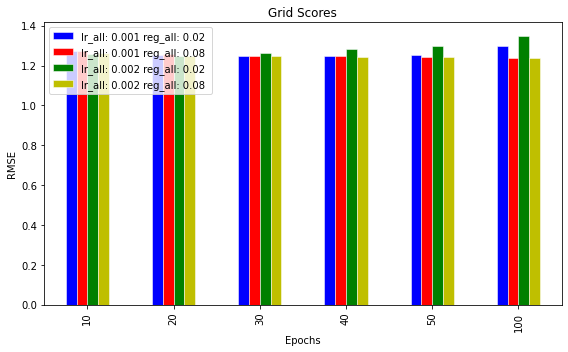

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from itertools import cycle, islice
N = 6
ind = np.arange(N) 
width = 0.25
#plt.figure(figsize=(15, 8))
list1= [1.2722,1.2554, 1.2470, 1.2459, 1.2509,1.2996]
list2= [1.2725,1.2560,1.2493, 1.2458, 1.2438, 1.2370]
list3= [1.2602, 1.2491, 1.2616, 1.2820, 1.3001,1.3491]
list4= [1.2609,1.2503,1.2465, 1.2436, 1.2410,1.2393]
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
d = {'lr_all: 0.001 reg_all: 0.02 ': list1,
      'lr_all: 0.001 reg_all: 0.08': list2, 'lr_all: 0.002 reg_all: 0.02':list3, 'lr_all: 0.002 reg_all: 0.08': list4}
df = pd.DataFrame(d)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

df.plot(kind='bar', edgecolor='white',width = 0.5 ,linewidth=0.5,color=my_colors)
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel('RMSE')
plt.xticks(ind,['10', '20', '30','40','50','100'])
plt.title("Grid Scores")
plt.show()

In [22]:
print("Best parameters using Grid Search CV",  combinations[mse.index(min(mse))], min(mse))

Best parameters using Grid Search CV [100, 0.001, 0.08] 1.2369590300385571


In [19]:
tic = time.time()
best_fit = SVD(n_epochs = 100, lr_all = 0.001, reg_all = 0.08)
best_fit.fit(new_trainset)
fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()
new_predictions = best_fit.test(new_testset)
pred_time = time.time()-toc
print('pred ', pred_time)
accuracy.rmse(new_predictions)

fit  3067.202746629715
pred  123.09491348266602
RMSE: 1.2366


1.2366243404865955

In [20]:
def get_recommendations(userid):
    # get the list of the product ids
    unique_ids = rec_data_products['product_id'].unique()
    print('total products:', len(unique_ids))
    ids = rec_data_products.loc[rec_data_products['user_id']== userid, 'product_id']
    print('user : ', userid, 'rated' , len(ids) , 'number of products')
    # remove the rated movies for the recommendations
    products_to_predict = np.setdiff1d(unique_ids,ids)
    return products_to_predict

In [21]:
products_to_predict = get_recommendations(48551)
print(len(products_to_predict))


total products: 49685
user :  48551 rated 151 number of products
49534


In [22]:
products_to_predict

array([    1,     2,     3, ..., 49686, 49687, 49688], dtype=int64)

In [23]:
my_recs = []
for iid in products_to_predict:
    my_recs.append((iid, best_fit.predict(48551,iid).est))

df_result = pd.DataFrame(my_recs, columns=['product_id', 'predictions']).sort_values('predictions', ascending=False)


In [24]:
df_recs = pd.merge(df_result,products_Desc, on="product_id")

In [25]:
df_recs

,product_id,predictions,Unnamed: 0,product_name,aisle_id,department_id,aisle,department,metadata,vector_data
0,29447,3.627584,29446,"Milk, Organic, Vitamin D",84,16,milk,dairy eggs,"milk dairy eggs Milk, Organic, Vitamin D","milk dairy eggs Milk, Organic, Vitamin D"
1,17469,3.448197,17468,Lo-Carb Energy Drink,64,7,energy sports drinks,beverages,energy sports drinks beverages Lo-Carb Energy ...,energy sports drinks beverages Lo-Carb Energy ...
2,5514,3.443144,5513,Organic Homogenized Whole Milk,84,16,milk,dairy eggs,milk dairy eggs Organic Homogenized Whole Milk,milk dairy eggs Organic Homogenized Whole Milk
3,20940,3.419981,20939,Organic Low Fat Milk,84,16,milk,dairy eggs,milk dairy eggs Organic Low Fat Milk,milk dairy eggs Organic Low Fat Milk
4,43394,3.364294,43393,Organic Lactose Free Whole Milk,91,16,soy lactosefree,dairy eggs,soy lactosefree dairy eggs Organic Lactose Fre...,soy lactosefree dairy eggs Organic Lactose Fre...
...,...,...,...,...,...,...,...,...,...,...
49529,17091,1.008910,17090,Shooting Star Beeswax Birthday Candle,101,17,air fresheners candles,household,air fresheners candles household Shooting Star...,air fresheners candles household Shooting Star...
49530,13373,1.005216,13372,Food Coloring,97,13,baking supplies decor,pantry,baking supplies decor pantry Food Coloring,baking supplies decor pantry Food Coloring
49531,10313,1.004684,10312,Lotion for Everybody 3 in 1 Mint And Coconut L...,109,11,skin care,personal care,skin care personal care Lotion for Everybody 3...,skin care personal care Lotion for Everybody 3...
49532,12547,1.004484,12546,Round Dish Scrubber,10,17,kitchen supplies,household,kitchen supplies household Round Dish Scrubber,kitchen supplies household Round Dish Scrubber


In [26]:
df_recs_per_aisle = df_recs.groupby('aisle').first()

In [27]:
df_recs_per_aisle

,product_id,predictions,Unnamed: 0,product_name,aisle_id,department_id,department,metadata,vector_data
aisle,,,,,,,,,
air fresheners candles,35662,2.472424,35661,Citrus Blend Air Freshener,101,17,household,air fresheners candles household Citrus Blend ...,air fresheners candles household Citrus Blend ...
asian foods,25738,2.556896,25737,Kimchi Flavor Noodle Soup,66,6,international,asian foods international Kimchi Flavor Noodle...,asian foods international Kimchi Flavor Noodle...
baby accessories,10797,2.764630,10796,Nurser Liners,82,18,babies,baby accessories babies Nurser Liners,baby accessories babies Nurser Liners
baby bath body care,4542,2.218667,4541,Diaper Rash Ointment,102,18,babies,baby bath body care babies Diaper Rash Ointment,baby bath body care babies Diaper Rash Ointment
baby food formula,42152,3.159019,42151,Toddler Drink Go & Grow Powder,92,18,babies,baby food formula babies Toddler Drink Go & Gr...,baby food formula babies Toddler Drink Go & Gr...
...,...,...,...,...,...,...,...,...,...
trash bags liners,30208,2.150786,30207,Large 30 Gallon Trash Bags Roll,60,17,household,trash bags liners household Large 30 Gallon Tr...,trash bags liners household Large 30 Gallon Tr...
vitamins supplements,15708,2.802414,15707,Lime Tangerine Yerba Mate Shot,47,11,personal care,vitamins supplements personal care Lime Tanger...,vitamins supplements personal care Lime Tanger...
water seltzer sparkling water,13128,3.125564,13127,Purified Alkalkine Water with Minerals pH10,115,7,beverages,water seltzer sparkling water beverages Purifi...,water seltzer sparkling water beverages Purifi...


In [28]:
df_recs_per_aisle_new =  pd.DataFrame(df_recs_per_aisle, columns=['product_id','product_name' ,'predictions']).sort_values('predictions', ascending=False)

In [29]:
top_10= df_recs_per_aisle_new.head(10)

In [33]:
top_10_products =  top_10[['product_id', 'product_name']]

In [34]:
top_10_products

,product_id,product_name
aisle,,
milk,29447,"Milk, Organic, Vitamin D"
energy sports drinks,17469,Lo-Carb Energy Drink
soy lactosefree,43394,Organic Lactose Free Whole Milk
bread,44741,Honey Whole Wheat
eggs,44177,Large Grade A Eggs
yogurt,4962,Yotoddler Organic Pear Spinach Mango Yogurt
fresh fruits,39276,Bananas
baby food formula,42152,Toddler Drink Go & Grow Powder
water seltzer sparkling water,13128,Purified Alkalkine Water with Minerals pH10
